# Airfoil Self Noise NASAdataset 

The self-noise data set used in this example was processed by NASA, and so it is referred here to as the NASA data set. It was obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

Lets begin with importing basic libraries and funtions .

# Imports

Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline (You'll import sklearn as you need it.)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [56]:
% matplotlib inline 

# Get the Data

Import the dataset 
Dataset with .dat refrence has to be inserted using pandas in following manner.

In [2]:
# using open function open the file and 'r' means read 
# print row by row data from the dataset

with open('airfoil_self_noise.dat','r') as file:
    for rows in file:
        print(rows)

800	0	0.3048	71.3	0.00266337	126.201

1000	0	0.3048	71.3	0.00266337	125.201

1250	0	0.3048	71.3	0.00266337	125.951

1600	0	0.3048	71.3	0.00266337	127.591

2000	0	0.3048	71.3	0.00266337	127.461

2500	0	0.3048	71.3	0.00266337	125.571

3150	0	0.3048	71.3	0.00266337	125.201

4000	0	0.3048	71.3	0.00266337	123.061

5000	0	0.3048	71.3	0.00266337	121.301

6300	0	0.3048	71.3	0.00266337	119.541

8000	0	0.3048	71.3	0.00266337	117.151

10000	0	0.3048	71.3	0.00266337	115.391

12500	0	0.3048	71.3	0.00266337	112.241

16000	0	0.3048	71.3	0.00266337	108.721

500	0	0.3048	55.5	0.00283081	126.416

630	0	0.3048	55.5	0.00283081	127.696

800	0	0.3048	55.5	0.00283081	128.086

1000	0	0.3048	55.5	0.00283081	126.966

1250	0	0.3048	55.5	0.00283081	126.086

1600	0	0.3048	55.5	0.00283081	126.986

2000	0	0.3048	55.5	0.00283081	126.616

2500	0	0.3048	55.5	0.00283081	124.106

3150	0	0.3048	55.5	0.00283081	123.236

4000	0	0.3048	55.5	0.00283081	121.106

5000	0	0.3048	55.5	0.00283081	119.606

6300	0	0.3048	55.5	0.00283

This problem has the following inputs: 

1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters. 
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

The only output is: 
 Scaled sound pressure level, in decibels. 

In [3]:
# Column Names for Each Column in DataFrame
cols = ['Freq_hz', 'Angle_of_attack','Chord_length', 'free_stream_vel', 'disp_thickness', 'sound_pressure_level']

In [7]:
# Read .dat File and add to Pandas Dataframe
# split helps to keep gaps between the elements of dataset if no argument is passed to it.

with open('airfoil_self_noise.dat','r') as file:
    df = pd.DataFrame((rows.rstrip().split() for rows in file), columns=cols)


Check the head  and check out its info() and describe() methods.
head gives only first 5 elements of the dataset


In [8]:
df.head()

,Freq_hz,Angle_of_attack,Chord_length,free_stream_vel,disp_thickness,sound_pressure_level
0,800,0,0.3048,71.3,0.00266337,126.201
1,1000,0,0.3048,71.3,0.00266337,125.201
2,1250,0,0.3048,71.3,0.00266337,125.951
3,1600,0,0.3048,71.3,0.00266337,127.591
4,2000,0,0.3048,71.3,0.00266337,127.461


In [9]:
df.info()      

# this dataset has only 6 column with 1503 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Freq_hz                 1503 non-null object
Angle_of_attack         1503 non-null object
Chord_length            1503 non-null object
free_stream_vel         1503 non-null object
disp_thickness          1503 non-null object
sound_pressure_level    1503 non-null object
dtypes: object(6)
memory usage: 70.5+ KB


In [10]:
df.describe()

,Freq_hz,Angle_of_attack,Chord_length,free_stream_vel,disp_thickness,sound_pressure_level
count,1503,1503,1503,1503,1503,1503
unique,21,27,6,4,105,1456
top,2000,0,0.0254,39.6,0.00529514,127.315
freq,105,329,278,480,23,3


In [24]:
 df.columns

Index(['Freq_hz', 'Angle_of_attack', 'Chord_length', 'free_stream_vel',
       'disp_thickness', 'sound_pressure_level'],
      dtype='object')

In [25]:
df.shape

(1503, 6)

In [15]:
# Features
X = df.drop(['sound_pressure_level'],axis = 1)

# Labels
Y = df['sound_pressure_level']

In [19]:
X[:10]

,Freq_hz,Angle_of_attack,Chord_length,free_stream_vel,disp_thickness
0,800,0,0.3048,71.3,0.00266337
1,1000,0,0.3048,71.3,0.00266337
2,1250,0,0.3048,71.3,0.00266337
3,1600,0,0.3048,71.3,0.00266337
4,2000,0,0.3048,71.3,0.00266337
5,2500,0,0.3048,71.3,0.00266337
6,3150,0,0.3048,71.3,0.00266337
7,4000,0,0.3048,71.3,0.00266337
8,5000,0,0.3048,71.3,0.00266337
9,6300,0,0.3048,71.3,0.00266337


In [20]:
Y[:10]

0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
5    125.571
6    125.201
7    123.061
8    121.301
9    119.541
Name: sound_pressure_level, dtype: object


# Training and testing

 Let's explore the data!

In [31]:
 X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression   

In [61]:
lm = LinearRegression(normalize=True)

In [62]:
lm.fit(X_train,Y_train)     

#Train/fit lm on the training data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

# Predicting Test Data 

predicting test outcomes using trained data (X_train and Y_train)

In [63]:
predictions = lm.predict(X_test)

In [35]:
predictions

array([129.77680975, 129.57982352, 130.80603015, 133.34374565,
       119.95212448, 124.72602906, 132.5215376 , 130.78834178,
       127.36567545, 127.25473934, 123.75573525, 125.18102056,
       120.55622715, 125.06472615, 124.30190325, 128.99147628,
       122.31729615, 128.87454529, 127.21944462, 122.08393373,
       120.99774007, 128.43264008, 132.61089641, 120.69533203,
       114.67560549, 126.2743767 , 126.70633558, 125.965093  ,
       124.9951444 , 122.45528247, 122.73099675, 122.47105702,
       130.26881349, 119.42477426, 123.93865738, 130.4014444 ,
       125.20691906, 124.12088998, 127.0120548 , 122.28899044,
       115.92986091, 123.87250359, 119.10662031, 133.80209478,
       123.25555471, 124.05706559, 132.73964298, 120.14849591,
       119.79859791, 129.51972618, 117.99208047, 123.42073398,
       112.39555384, 133.68351724, 122.1969941 , 120.61893797,
       122.9281146 , 123.07351601, 118.6852811 , 130.45410857,
       126.76747832, 119.48629226, 127.25002798, 134.76

Create a scatterplot of the real test values versus the predicted values. 

Text(0,0.5,'Predicted values')

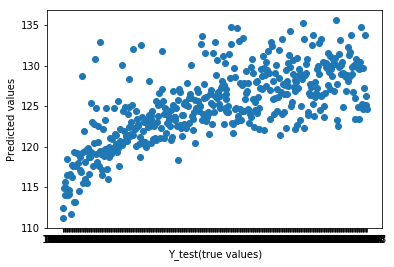

In [58]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y_test(true values)')
plt.ylabel('Predicted values')

# Evaluating the Model

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [64]:
from sklearn import metrics
print('MAE:' , metrics.mean_absolute_error(Y_test , predictions))
print('MSE:' , metrics.mean_squared_error(Y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE: 3.510346177232774
MSE: 21.21305715769324
RMSE: 4.605763471748548


In [65]:
metrics.explained_variance_score(Y_test , predictions)   

0.5464155085745155

In [44]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [45]:
cdf

,Coeff
Freq_hz,-0.001208
Angle_of_attack,-0.421277
Chord_length,-35.949614
free_stream_vel,0.093341
disp_thickness,-147.089444
